# MOVIE RECOMMENDATION 2022
© Explore Data Science Academy

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 100px">
<img src="resources/imgs/Image_header.png"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=700px/>
</div>

#### Development Team

1. Mercy Milkah Gathoni
2. Linda Kelida
3. Samuel Mijan
4. Sipho Lukhele
5. Jessica Njuguna

<a id="one"></a>
## 1. INTRODUCTION

### Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system having personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

<a id="cont"></a>
### Table of Contents

**<a href=#one>1. Introduction</a>**
- Problem Statement
- Table of Contents
- Summary
- Preliminary Activities


**<a href=#two>2. Exploratory Data Analysis</a>**


**<a href=#three>3. Feature Engineering</a>**
- Dealing with Null Values
- Data Scaling
- Dimension Reduction


**<a href=#four>4. Modelling</a>**
- Logging Comet Experiments


**<a href=#five>5. Model Perfomance Comparison</a>**


**<a href=#six>6. Model Explanations</a>**


**<a href=#seven>7. Conclusion</a>**


**<a href=#eight>8. Appendix</a>**
- Kaggle Submissions

### Summary

**Agenda:**

**Deliverables:**

**Results:**

### Preliminary Activities

#### Comet set up

from comet_ml import Experiment

experiment = Experiment(api_key="MHehhbanm9HbbvXptMjQ0hinn",
    project_name="movie-recommender-2022",
    workspace="jessica-njuguna")

#### Importing Packages

In [2]:
# Libraries for data loading, data manipulation
import pandas as pd

# Libraries for mathematical analyses
import numpy as np

#Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1)
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
# from wordcloud import WordCloud
# from statsmodels.graphics.correlation import plot_corr
# from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION
# from wordcloud import STOPWORDS

# #Libraries to clean the text
# import contractions #This expands contraction such as 'don't' to 'do not'
# import regex as re
# import string
# import nltk
# from nltk.tokenize import TreebankWordTokenizer
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# import emoji #allows us to manipulate with emojis
# import itertools

# #Libraries for text pre-processing
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# #Libraries for data balancing
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE


# # Libraries for model building
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# #Libraries for Model Performance
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
# from sklearn.tree import plot_tree

#Library for creating pickle files of the models
import pickle

#### Importing Data

###### Let’s load the datasets using pandas.

In [3]:
raw_train_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/train.csv')
raw_test_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/test.csv')
raw_movies_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/movies.csv')
raw_tags_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/tags.csv')
raw_links_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/links.csv')
raw_imdb_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/imdb_data.csv')
raw_getags_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/genome-tags.csv')
raw_gescores_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/genome-scores.csv')

###### Getting to know my data frames

We will create functions to perform basic EDA on all the datasets

###### Head() prints the first 5 rows of our dataset including column header and the content of each row.

In [4]:
#function that displays the first five raws of a data frame
def display_df(df):
    '''This functions takes in a dataframe and returns the first five raws of it'''
    return df.head()

Call the function to any data frame that we have ...
Here we will call the function on the train set and have a look at the columns and the values in it 

###### Info() prints the column header and the data type stored in each column. This function is extremely useful when we are trying to understand what values need to change types in order to apply functions to them. Integers that are stored as string will not be added together until we transform them into integers.

We will create a function that displays the info about the data frames when called upon,it will tell us a couple of things:
1. The type of columns we have
2. Whether our dataframes have missing values
3. The number of entries and columns in the dataframe

In [5]:
#define a function that displays the information of a df
def display_info(df):
    '''This function takes in a dataframe and  returns the information about a dataframe'''
    return df.info()
    

###### Describe() gives the mean, median, standard deviation and percentiles of all the numerical values in our dataset. 

So we create a function that takes in a dataframe and returns the summary statistics

In [6]:
#define a data frame summary statistic function
def summary_stat(df):
    '''This function takes a dataframe and returns the summary statistics of all numerical columns'''
    return df.describe()

###### Do we have null values in our datasets?  We will find out when calling the below function

In [7]:
# define a function for checking missing values
def missing_val(df):
    '''A function that checks for missing values per column when passing in a dataframe
    and returns the count of missing values in each column'''
    # Count total NaN at each column in a DataFrame
    count = print(" \nCount total NaN at each column in a DataFrame : \n\n",
              df.isnull().sum())
    return count

<a id="two"></a>
## 2. EXPLORATORY DATA ANALYSIS
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

A high percentage of movies without budget, director or title cast. In such a case, this dataset is disqualified from our model due to huge number of missing information

### IMDB, Movies and Tags Data Sets

Let’s create an EDA through this data with beautiful charts and visuals to gain some insights. We will merge three of the datasets for better understanding

Lets see the imdb, movies and tag datasets

In [8]:
display_df(raw_imdb_df)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [9]:
display_df(raw_movies_df)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
display_df(raw_tags_df)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Having looked at the three sets, we will merge them together on the movieId so as to perform better visualization analysis

In [11]:
#merge imdb set to movies set on their id 
movies_df = raw_movies_df.merge(raw_imdb_df, how = 'left', on = 'movieId')


In [12]:
movies_df = movies_df.merge(raw_tags_df, how = 'left', on = 'movieId')
display_df(movies_df)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361.0,Pixar,1.216146e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,Pixar,1.223305e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,time travel,1.223305e+09


In [13]:
display_info(movies_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110532 entries, 0 to 1110531
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   movieId        1110532 non-null  int64  
 1   title          1110532 non-null  object 
 2   genres         1110532 non-null  object 
 3   title_cast     677587 non-null   object 
 4   director       678498 non-null   object 
 5   runtime        663981 non-null   float64
 6   budget         584923 non-null   object 
 7   plot_keywords  675004 non-null   object 
 8   userId         1093360 non-null  float64
 9   tag            1093344 non-null  object 
 10  timestamp      1093360 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 101.7+ MB


In our merged set, we have 11 columns 3 of float type, 1 of int type and 7 of object type, from the above we also see that we have 1110532 entries the first three columns have no missing values.

In [14]:
summary_stat(movies_df)

,movieId,runtime,userId,timestamp
count,1.110532e+06,663981.000000,1.093360e+06,1.093360e+06
mean,6.012344e+04,115.432430,6.759022e+04,1.430115e+09
std,6.085502e+04,25.505062,5.152114e+04,1.177384e+08
min,1.000000e+00,1.000000,3.000000e+00,1.135429e+09
25%,3.578000e+03,99.000000,1.520400e+04,1.339262e+09
50%,4.804300e+04,112.000000,6.219900e+04,1.468929e+09
75%,1.048810e+05,128.000000,1.136420e+05,1.527402e+09
max,2.091710e+05,877.000000,1.625340e+05,1.574317e+09


The average runtime for movies is about 115 minutes and from this also we are able to see that the 
maximum runtime as 877 minutes(such a long time watching a movie).


###### Check for duplicates

In [15]:
# Use the DataFrame.duplicated() method to return a series of boolean values

movies_df.duplicated().value_counts()

False    1110532
dtype: int64

No duplicates!!

###### Finding how many unique values are there in the dataset

In [16]:
movies_df.nunique()

movieId           62423
title             62325
genres             1639
title_cast        15161
director          10493
runtime             257
budget             1277
plot_keywords     14246
userId            14592
tag               73050
timestamp        907730
dtype: int64

In [17]:
missing_val(movies_df)

 
Count total NaN at each column in a DataFrame : 

 movieId               0
title                 0
genres                0
title_cast       432945
director         432034
runtime          446551
budget           525609
plot_keywords    435528
userId            17172
tag               17188
timestamp         17172
dtype: int64


Only three of the columns have no missing values, the rest have quite a large amount of missing values and we will visualizejust how much values we miss on this merged data set

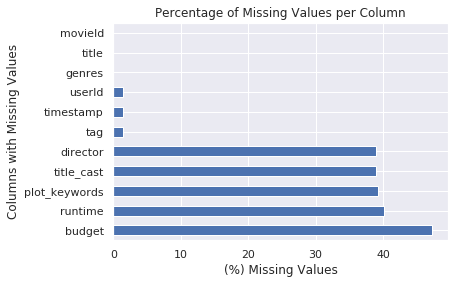

In [18]:
# The percentage of each column of missing values
total = movies_df.isnull().sum().sort_values(ascending=False)
percent_1 = movies_df.isnull().sum()/movies_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='barh')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

Imputation is a treatment method for missing value by filling it in using certain techniques. Can use mean, mode, or use predictive modeling. In this module, we will discuss the use of the fillna function from Pandas for this imputation. Drop rows containing missing values. Can use the dropna function from Pandas.



In [19]:
movies_df.director.fillna("No Director", inplace=True)
movies_df.title_cast.fillna("No Cast", inplace=True)

The easiest way to get rid of them would be to delete the rows with the missing data for missing values. However, this wouldn’t be beneficial to our EDA since it is a loss of information. Since “director,” “cast,” and  contain the majority of null values, we chose to treat each missing value is unavailable..

###### 1. Top Directors 
To know the most popular director, we can visualize it.

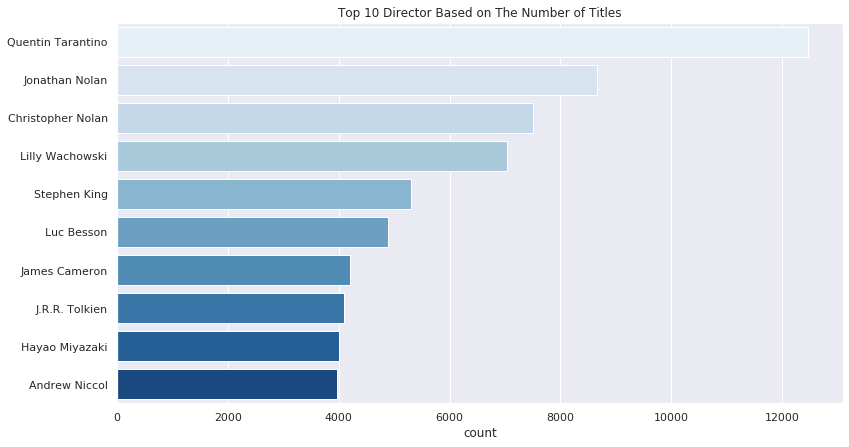

In [20]:
filtered_directors = movies_df[movies_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

The most popular director on Netflix, with the most titles, is mainly Quentin Tarantino

###### 2. Top Genres 

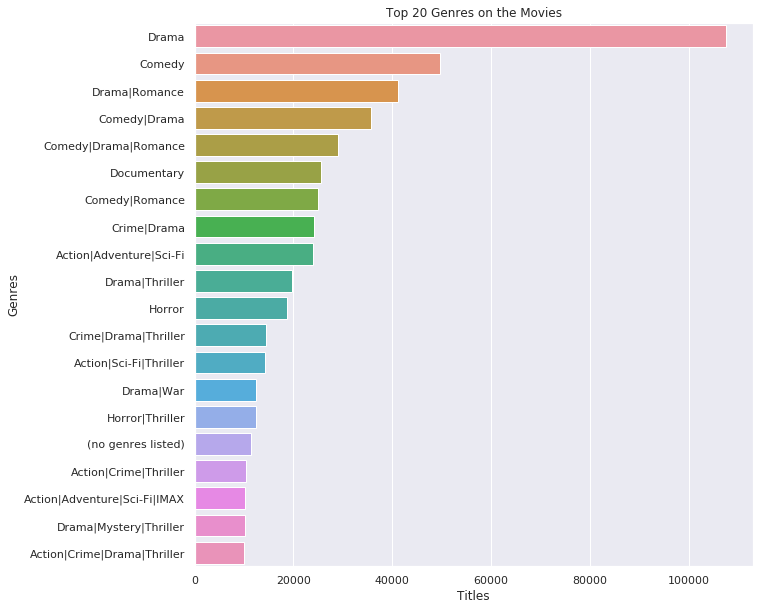

In [23]:
filtered_genres = movies_df.set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on the Movies')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, we know that Drama Movies take the first place, followed by comedies and comedy romance.

<a id="three"></a>
## 3. FEATURE ENGINEERING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Dealing with Null Values

#### Data Scaling

#### Dimension Reduction

<a id="four"></a>
## 4. MODELLING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Logging Experiments on Comet

In [8]:
# params = {"test_size": 0.3,
#           "model_type": "Bernoulli-Naive_Bayes",
#           "vectorizer": "tfidf vectorizer",
#           "param_grid": "None" ,
#           "stratify": True
#           }
# metrics = {"F1 score:": bnb_f1,
#            "Recall:": bnb_rec,
#            "Precision:": bnb_prec,
#            'Accuracy': bnb_acc
#            }
experiment_name = 'Comet Set Up'

In [9]:
experiment.set_name(experiment_name)
# experiment.log_parameters(params)
# experiment.log_metrics(metrics)
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jessica-njuguna/movie-recommender-2022/be36105dd4534d9e87cb030e25209e76
COMET INFO:   Others:
COMET INFO:     Name : Comet Set Up
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (10.63 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet befo

<a id="five"></a>
## 5. MODEL PERFORMANCE COMPARISON
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 6. MODEL EXPLANATIONS
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. CONCLUSION
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="eight"></a>
## 8. APPENDIX
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>